In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [22]:
iris = datasets.load_iris()

In [23]:
iris_data=pd.DataFrame(data=iris.data,columns=iris.feature_names)
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [24]:
# Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [25]:
X_scaled = scaler.fit_transform(iris_data)

In [26]:
X_scaled.shape

(150, 4)

In [27]:
# Apply the PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [28]:
pca_scaled = pca.fit_transform(X_scaled)

In [29]:
pca_scaled.shape

(150, 2)

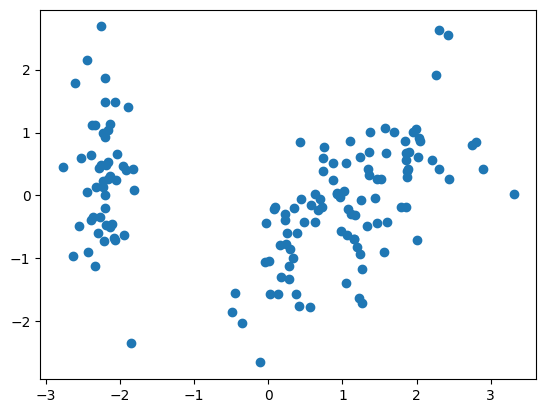

In [30]:
plt.scatter(pca_scaled[:,0], pca_scaled[:,1])

Text(0, 0.5, 'Euclidean distances')

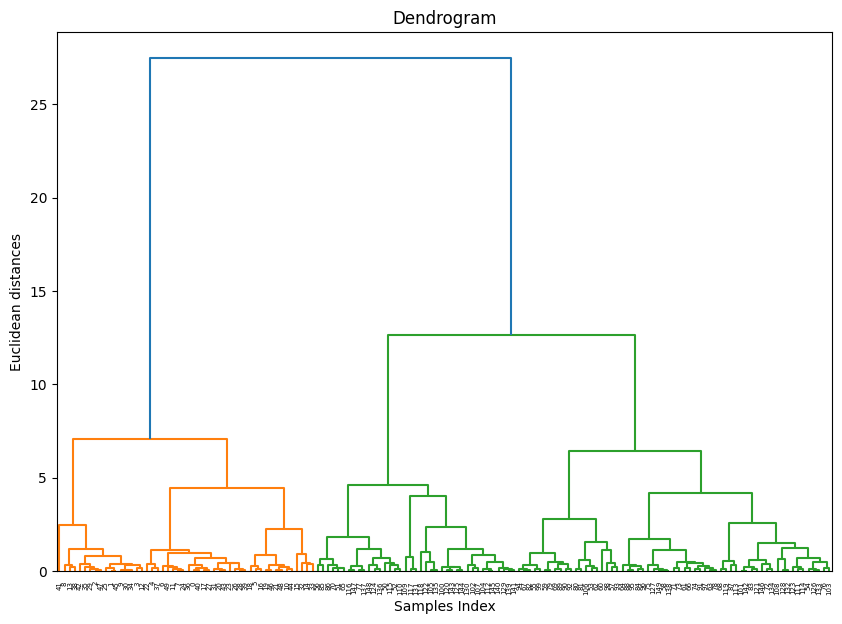

In [31]:
# Agglomerative Clustering
# To construct a dendogram

import scipy.cluster.hierarchy as sc

# plot the dendogram
plt.figure(figsize=(10, 7))
plt.title("Dendrogram")

# create dendogram
sc.dendrogram(sc.linkage(pca_scaled, method='ward'))
plt.title("Dendrogram")
plt.xlabel("Samples Index")
plt.ylabel("Euclidean distances")

In [33]:
from sklearn.cluster import AgglomerativeClustering

# 'affinity' was removed in recent scikit-learn versions; use 'metric' instead.
cluster = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
cluster.fit(pca_scaled)

AgglomerativeClustering()

In [34]:
cluster.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

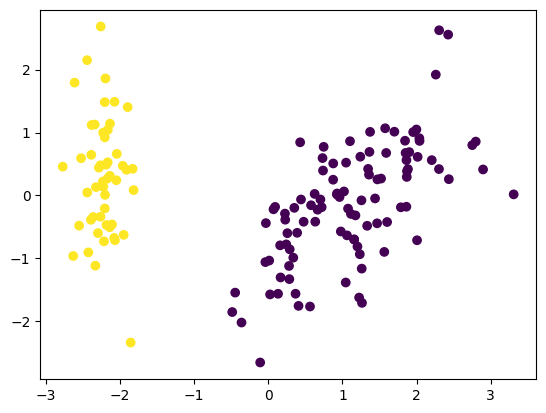

In [35]:
plt.scatter(pca_scaled[:,0], pca_scaled[:,1], c=cluster.labels_)

In [36]:
# checking accuracy by silhouette score
from sklearn.metrics import silhouette_score
silhouette_score(pca_scaled, cluster.labels_)

np.float64(0.6145202036230449)